In [185]:
import math
import numpy as np
from my_helpers import *
import viz

In [186]:
from matplotlib.ticker import EngFormatter
engFormat = EngFormatter()

In [187]:
Vrms = 1.7675
R_L = 10
L = 100*si.m
C = 47*si.n
# C = 36*si.n # overriding for testing
# C = 20*si.n # overriding for testing
Rw = 119


In [188]:
#Exact Fr = 2315 Hz
get_resonant_frequency(L,C)

## TODO
## Impliment exact frequency

2321.51344209472

In [189]:
Fr = 2315

In [190]:
def get_exact_resonant_frequency(L,C,Rw):
    # Denominator is the same as the inexact formula
    res_freq = get_resonant_frequency(L,C)
    # A fancy numerater accounts for winding resistance
    numerator = math.sqrt(1-Rw**2*(C/L))
    exact_freq = numerator*res_freq
    return exact_freq

Fr_exact = get_exact_resonant_frequency(L,C,Rw)
Fr_exact

2313.7749306679543

In [191]:
freqs = [
    700,
    900,
    1000,
    2000,
    Fr,
    3000,
    5000,
    7000
]

Xc_list = [get_capacitive_reactance(C,freq) for freq in freqs]
Xc_list

[-4837.536264191348j,
 -3762.528205482159j,
 -3386.2753849339438j,
 -1693.1376924669719j,
 -1462.7539459757854j,
 -1128.7584616446477j,
 -677.2550769867886j,
 -483.7536264191347j]

In [192]:
Voltages_R = [
    34.4*si.m,
    26.3*si.m,
    23.2*si.m,
    6.31*si.m,
    3.5*si.m,
    2.9*si.m,
    14.4*si.m,
    23.8*si.m,
]


In [193]:
freqs_theory = np.linspace(min(freqs),max(freqs),100)

voltages_theory = []
for freq in freqs_theory:
    Xl = get_inductive_reactance(L,freq)+Rw
    Xc = get_capacitive_reactance(C,freq)
    Xt = recipsumrecip([Xl,Xc])
    Z = sum([R_L,Xt])
    V_out = Vrms*(R_L/Z)
    voltages_theory.append(abs(V_out))

In [194]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

Text(0, 0.5, 'Voltage')

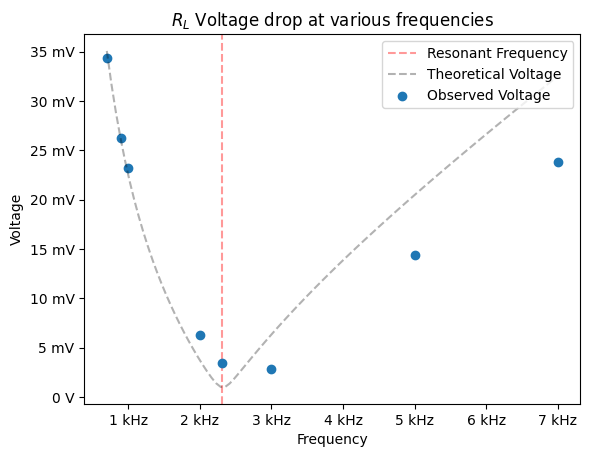

In [195]:
fig = plt.figure()
ax = plt.gca()
ax.axvline(Fr_exact, color='red',alpha=0.4,label='Resonant Frequency',linestyle='--',zorder=-1)
ax.plot(freqs_theory,voltages_theory,color='black',alpha=0.3,linestyle='--',label='Theoretical Voltage')
ax.scatter(freqs,Voltages_R,label='Observed Voltage')
ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='V'))
ax.legend(loc='upper right')
ax.set_title('$R_L$ Voltage drop at various frequencies')
ax.set_xlabel('Frequency')
ax.set_ylabel('Voltage')

Text(0, 0.5, 'Voltage')

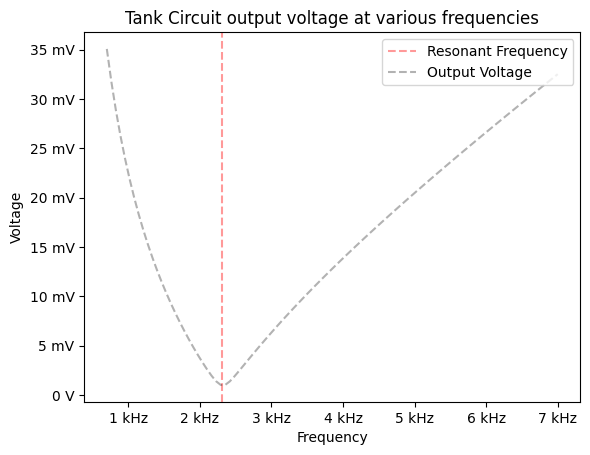

In [203]:
fig = plt.figure()
ax = plt.gca()
ax.axvline(Fr_exact, color='red',alpha=0.4,label='Resonant Frequency',linestyle='--',zorder=-1)
ax.plot(freqs_theory,voltages_theory,color='black',alpha=0.3,linestyle='--',label='Output Voltage')
# ax.scatter(freqs,Voltages_R,label='Observed Voltage')
ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='V'))
ax.legend(loc='upper right')
ax.set_title('Tank Circuit output voltage at various frequencies')
ax.set_xlabel('Frequency')
ax.set_ylabel('Voltage')

In [197]:
def get_exact_resonant_frequency(L,C,Rwinding):
    # Denominator is the same as the inexact formula
    res_freq = get_resonant_frequency(L,C)
    # A fancy numerater accounts for winding resistance
    numerator = math.sqrt(abs(1-Rwinding**2*(C/L)))
    exact_freq = numerator*res_freq
    return exact_freq

get_exact_resonant_frequency(L,C,510)   

2174.9904977245706

In [198]:
1459**2*(C/L)

1.00048007

In [199]:
rw_observed = [10,100,510]
fr_observed = [2511.96,2511.96,2511.96]

In [200]:
Rw_theory = range(0,1000)

Resonant_freqs = []
for Rwinding in Rw_theory:
    out = get_exact_resonant_frequency(L,C,Rwinding)
    Resonant_freqs.append(out)

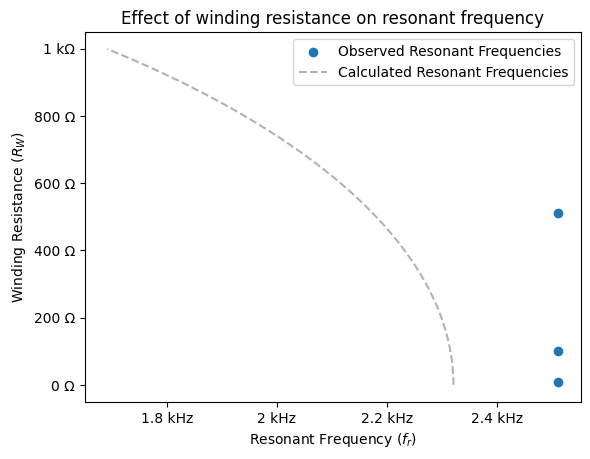

In [201]:
fig, ax = plt.subplots()
ax.set_title('Effect of winding resistance on resonant frequency')
ax.scatter(
        fr_observed,
        rw_observed,
        label = 'Observed Resonant Frequencies'
        )
ax.plot(
        Resonant_freqs,
        Rw_theory, 
        color='black',
        alpha=0.3,
        linestyle='--',
        label = 'Calculated Resonant Frequencies'
        )
ax.yaxis_inverted
ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='Ω'))
ax.set_xlabel('Resonant Frequency $(f_r)$')
ax.set_ylabel('Winding Resistance $(R_W)$')
ax.legend()

In [202]:
def calc_q_factor(reactance,winding_resistance):
    return reactance/winding_resistance

for n in [10,100,500]:
    print(
        calc_q_factor(get_inductive_reactance(L,Fr_exact).imag,n)
    )

145.37876648493358
14.537876648493357
2.9075753296986715
